<a href="https://colab.research.google.com/github/Tamiriscoliveira/Data-Science/blob/main/Projeto_e_Aplica%C3%A7%C3%A3o_de_Minera%C3%A7%C3%A3o_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Nome: Tamiris Coutinho de Oliveira
# RGM:24235105
#PROJETO DE APLICAÇÃO E MINERAÇÃO DE DADOS

In [ ]:
#Segue a lista de requisitos do seu projeto:
#1 - Descrever o projeto, o propósito, a base de dados que será utilizada e as fases de execução do seu projeto na plataforma escolhida.
#2 - Descrever como se deu o processo de extração, tratamento e transformação dos dados e os atributos a serem utilizados no modelo.
#3 - Descrever qual algoritmo será utilizado (classificação, regressão, clustering, análise de textos, etc.
#4 - Apresentar a visualização, os resultados da execução e uma análise do projeto, se o modelo gerado possuir bom desempenho descreva como poderia ser utilizado no mundo real em interface com outros sistemas

## PROJETO DE APLICAÇÃO E MINERAÇÃO DE DADOS


Utilizado um conjunto de dados de  classificação binária simples no qual contém três atributos:
<br>
idade
<br>
interesse
<br>
sucesso
<br>
Podemos identificar o sucesso de várias pessoas ao aprenderem novos esportes.





In [ ]:
#bibliotecas utilizadas
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plot # for visualization
import pandas as pd # for handling and cleaning the dataset
import seaborn as sns # for visualization
import sklearn # for model evaluation and development
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_curve, auc

#conjunto de dados utilizado https://www.kaggle.com/sveneschlbeck/beginners-classification-dataset

#Importando o dataset e visualizando as vinte primeiras linhas
dados = pd.read_csv('classification.csv')
dados



,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0
...,...,...,...
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0


In [ ]:
#renomeando os atributos para português
a_renomear = {
    'age': 'idade',
    'interest	': 'interesse',
    'success': 'sucesso'
}
dados = dados.rename(columns=a_renomear)
dados

,idade,interest,sucesso
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0
...,...,...,...
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0


In [ ]:
#Exibindo as característica física dos dados.A quantidade de linhas e colunas.
print("O dado possui", dados.shape[0],"amostras e", dados.shape[1], "Atributos")

O dado possui 297 amostras e 3 Atributos


In [ ]:
#exibindo os dez primeiros atributos
dados.head(10)

,idade,interest,sucesso
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0
5,17.457907,21.765215,0.0
6,20.027969,73.454460,1.0
7,30.295138,62.901113,1.0
8,15.128978,32.402677,0.0
9,30.179457,58.982492,1.0


In [ ]:
#exibindo os dez ultimos atributos
dados.tail(10)

,idade,interest,sucesso
287,34.360465,29.310443,0.0
288,16.166632,24.010528,0.0
289,16.671398,40.172301,0.0
290,19.016591,-0.552276,0.0
291,13.027910,13.735581,0.0
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0
296,21.215594,48.265520,1.0


In [ ]:
#Extraindo medidas estatisticas do conjunto de dados
dados.describe()

,idade,interest,sucesso
count,297.000000,297.000000,297.000000
mean,23.709718,46.986527,0.569024
std,8.864000,21.956447,0.496049
min,2.347560,-0.852800,0.000000
25%,17.002148,28.689067,0.000000
50%,23.283644,45.695926,1.000000
75%,30.661149,65.171876,1.000000
max,45.773729,97.175508,1.000000


In [ ]:
#Extraindo as medidas estatisticas invertendo a matriz de medidas
dados.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
idade,297.0,23.709718,8.864000,2.34756,17.002148,23.283644,30.661149,45.773729
interest,297.0,46.986527,21.956447,-0.85280,28.689067,45.695926,65.171876,97.175508
sucesso,297.0,0.569024,0.496049,0.00000,0.000000,1.000000,1.000000,1.000000


In [ ]:
#Exibindo a composição do conjunto de dados,a quantidade de registro e seu tipo de dado
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     297 non-null    float64
 1   interest  297 non-null    float64
 2   sucesso   297 non-null    float64
dtypes: float64(3)
memory usage: 7.1 KB


#Correlação 

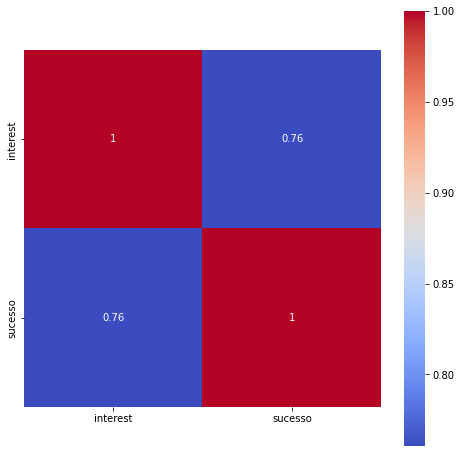

In [ ]:
#calculando a correlação dos dez primeiros atributos
plot.figure(figsize=(8,8))
medidas = dados.columns[1:11]
medidas_correlatas = dados[medidas].corr()
sns.heatmap(medidas_correlatas, cmap='coolwarm', annot=True, square=True)

#A imagem exibe o mapa de calor da correlação dos vinte primeiros atributos, identifica aonde teve maior atividade na correlação.

In [ ]:
#Identificando a relação entre os atributos utilizando a matriz de correlação
matriz_corr = dados.corr()
matriz_corr

,idade,interest,sucesso
idade,1.000000,0.142876,0.173307
interest,0.142876,1.000000,0.760703
sucesso,0.173307,0.760703,1.000000


Text(0, 0.5, 'Total')

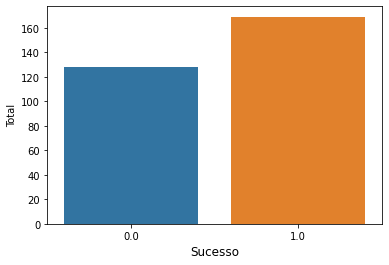

In [ ]:
#Distribuição de valores
plot.figure(figsize=(6,4))
sns.countplot(x=dados.sucesso, data=dados)
plot.xlabel('Sucesso', fontsize=12)
plot.ylabel('Total')

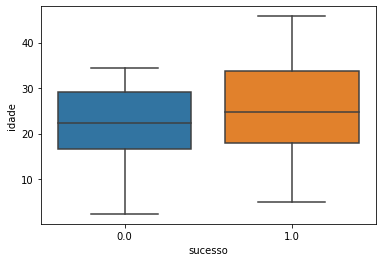

In [ ]:
#a distribuição dos valores com relação a idade e o sucesso do aprendizado
sns.boxplot(x='sucesso', y='idade', data=dados)

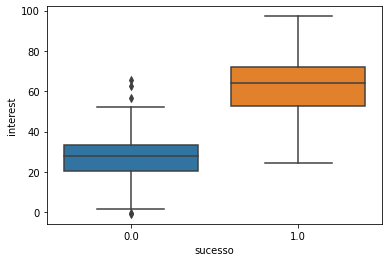

In [ ]:
#Aqui identificamos o sucesso com relação ao interesses.
sns.boxplot(x='sucesso', y='interest', data=dados)

In [ ]:
dados.head()

,idade,interest,sucesso
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


#PRE PROCESSAMENTOS

In [ ]:
#Dimensionamento dos dados
scaler = StandardScaler()
dados[['idade', 'interest']] = scaler.fit_transform(dados[['idade', 'interest']])
dados.head()

,idade,interest,sucesso
0,-0.005867,-1.283180,0.0
1,-0.128374,-1.323815,0.0
2,0.999394,-0.799421,0.0
3,-1.920167,-0.970912,1.0
4,-1.051840,-1.378487,0.0


In [ ]:
#divisão os dados para o treino

X = dados.drop('sucesso', axis=1)
y = dados.sucesso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((198, 2), (198,), (99, 2), (99,))

In [ ]:
#modelando os dados
params = {
    'n_estimators': range(50, 250, 50),
    'max_depth': range(1, 7, 2), 
    'n_jobs': [-2], 
    'min_samples_split': range(1, 10, 2)
}

In [ ]:
RF = RandomForestClassifier()
grid_clf = GridSearchCV(RF, param_grid=params, cv=5)

grid_clf.fit(X_train, y_train)
clf = grid_clf.best_estimator_

clf


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 459, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=150,
                       n_jobs=-2)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=150,
                       n_jobs=-2)

#Podemos identicar no modelo que o desempenho é satisfátorio com apenas um objeto foi detectado incorretamente

In [ ]:
pred = clf.predict(X_test)
pred_proba = clf.predict_proba(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        32
         1.0       0.99      1.00      0.99        67

    accuracy                           0.99        99
   macro avg       0.99      0.98      0.99        99
weighted avg       0.99      0.99      0.99        99



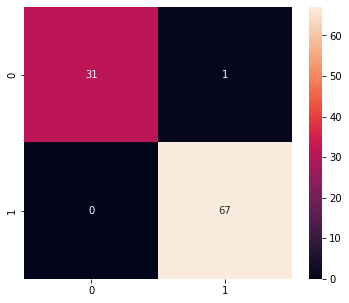

In [ ]:
plot.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, pred), annot=True)
